# taq_ask_bid_midpoint_spread_plot

#### Juan Camilo Henao Londono - 21.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

In [2]:
def taq_ask_bid_midpoint_spread_plot(ticker, year, month, day):
    """
    Plot the ask, bid, midpoint price and spread data during a open market
    day. The data is loaded from the mipoint price data results.
        :param ticker: string of the abbreviation of the stock to be analized
         (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: string of the month to be analized (i.e '07')
        :param day: string of the day to be analized (i.e '07')
    """

    function_name = taq_ask_bid_midpoint_spread_plot.__name__
    taq_data_tools.taq_function_header_print_plot(function_name, ticker,
                                                  ticker, year, month, day)

    # Load data

    ask = pickle.load(open(''.join((
                           '../taq_data_{1}/taq_midpoint_data/taq_midpoint_'
                           + 'data_ask_{1}{2}{3}_{0}.pickl').split())
                           .format(ticker, year, month, day), 'rb'))
    bid = pickle.load(open(''.join((
                           '../taq_data_{1}/taq_midpoint_data/taq_midpoint_'
                           + 'data_bid_{1}{2}{3}_{0}.pickl').split())
                           .format(ticker, year, month, day), 'rb'))
    midpoint = pickle.load(open(''.join((
                                '../taq_data_{1}/taq_midpoint_data/taq_'
                                + 'midpoint_data_midpoint_{1}{2}{3}_{0}.pickl'
                                ).split())
                                .format(ticker, year, month, day), 'rb'))
    spread = pickle.load(open(''.join((
                              '../taq_data_{1}/taq_midpoint_data/taq_midpoint'
                              + '_data_spread_{1}{2}{3}_{0}.pickl').split())
                              .format(ticker, year, month, day), 'rb'))
    time = pickle.load(open(''.join((
                            '../taq_data_{}/taq_midpoint_data/taq_midpoint_'
                            + 'data_time.pickl').split()).format(year), 'rb'))

    figure = plt.figure(figsize=(16, 9))
    figure.suptitle('{} - {}.{}.{}'.format(ticker, year, month, day),
                    fontsize=16)
    figure.tight_layout()
    figure.subplots_adjust(top=0.95, wspace=0.3)

    plt.subplot(4, 2, 1)
    plt.plot(time / 3600, midpoint, label='Midpoint')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(4, 2, 2)
    plt.plot(time / 3600, spread, label='Spread')
    plt.xlabel('Time')
    plt.ylabel('Spread')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(4, 2, 3)
    plt.plot(time / 3600, bid, label='Bid quotes')
    plt.plot(time / 3600, ask, label='Ask quotes')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(4, 2, 4)
    plt.scatter(time / 3600, ask, marker='.', s=5, label='Ask trades')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)

    # Saving data

    if (not os.path.isdir('../taq_plot_{1}/{0}/'
                          .format(function_name, year))):

        try:

            os.mkdir('../taq_plot_{1}/{0}/'
                     .format(function_name, year))
            print('Folder to save data created')

        except FileExistsError:

            print('Folder exists. The folder was not created')

    figure.savefig(
            '../taq_plot_{2}/{0}/{0}_{2}{3}_{1}i.png'
            .format(function_name, ticker, year, month))

    print('Plot saved')
    print()

    return None

TAQ data
taq_ask_bid_midpoint_spread_plot
Processing plot for the stock AAPL the 2008.03.10
Plot saved



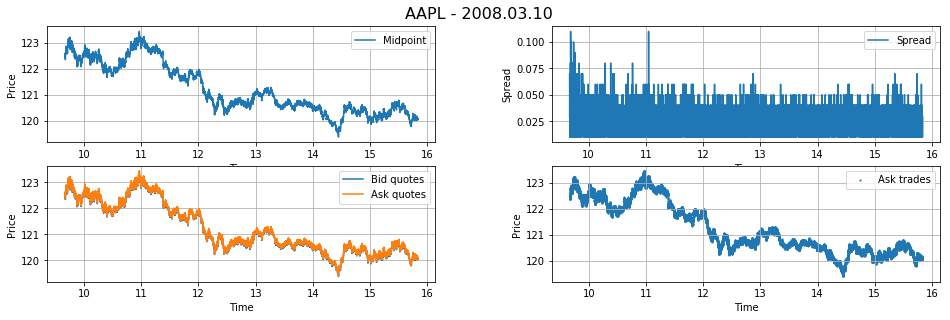

In [3]:
tickers = ['AAPL', 'MSFT']
year = '2008'
month = '03'
days = ['10', '11', '12', '13', '14']

taq_ask_bid_midpoint_spread_plot('AAPL', year, month, '10')